# BART

Welcome to analysis of Bay Area Rapid Transit

## BART Perks


https://bartperks.com/

details
https://bartperks.com/static/bartperks/files/faq.pdf


## BART Data

http://www.bart.gov/about/reports/ridership

* hourly ridership
* station names
* annual ridership since 1973


In [44]:
#import dask.dataframe as dd
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pandas as pd
from datetime import datetime
from bokeh.plotting import  figure, output_notebook, show
import folium

Populating the interactive namespace from numpy and matplotlib


/Users/ahoffer/.virtualenvs/test/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show', 'figure', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
file_name = "./data/date-hour-soo-dest-2011.csv"
bart_df = pd.read_csv(file_name, header = None, 
                      names = ["Day", "Hour", "Enter", "Exit", "Count"])

In [3]:
def convert_date(s):
    # datetime is unicode string so easier to just assign like this
    # s (unicode string)
    return datetime.strptime(str(s),"%Y-%m-%d %H")

def assign_points(t):
    # t - datetime string with date and hour
    multiplier = 1
    return multiplier
    
# def get_distance(enter, exit):
    # get the position 
    
    

In [4]:
bart_df["Day_Hour"] = bart_df.apply(lambda row: row["Day"] + " " + str(row["Hour"]), axis = 1)
bart_df["Time"] = bart_df["Day_Hour"].apply(convert_date)
bart_df.index = bart_df["Time"]
bart_df["Day of Week"] = bart_df["Time"].apply(datetime.weekday)

In [41]:
day_of_week = bart_df.groupby("Day of Week")
hour_index = bart_df.groupby("Hour")
exit_index = bart_df.groupby("Exit")

In [33]:
output_notebook()
hour_plot = figure(x_axis_label = "Hour", y_axis_label = "Count")

hour_plot.line(hour_index["Count"].sum().axes, hour_index["Count"].sum().axes)

Loading BokehJS ...

In [53]:
bart_df.head()

,Day,Hour,Enter,Exit,Count,Day_Hour,Time,Day of Week
Time,,,,,,,,
2011-01-01,2011-01-01,0,12TH,12TH,1,2011-01-01 0,2011-01-01,5
2011-01-01,2011-01-01,0,12TH,16TH,1,2011-01-01 0,2011-01-01,5
2011-01-01,2011-01-01,0,12TH,24TH,3,2011-01-01 0,2011-01-01,5
2011-01-01,2011-01-01,0,12TH,ASHB,2,2011-01-01 0,2011-01-01,5
2011-01-01,2011-01-01,0,12TH,BAYF,5,2011-01-01 0,2011-01-01,5


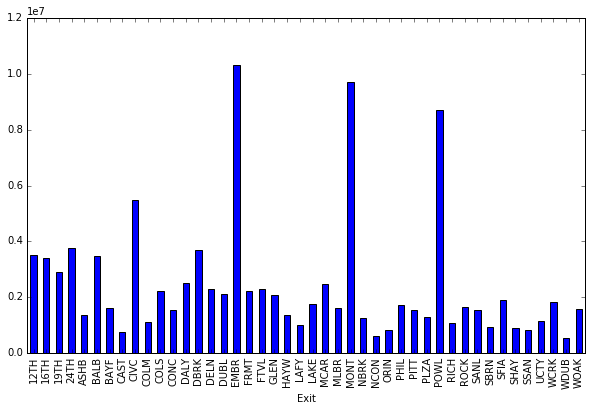

In [45]:
exit_index["Count"].sum().plot(kind="bar")

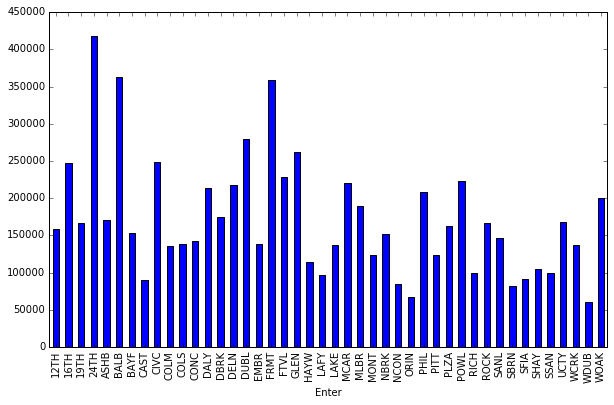

In [52]:
bart_df[bart_df.index.hour == 9].groupby("Enter")["Count"].sum().plot(kind="bar")

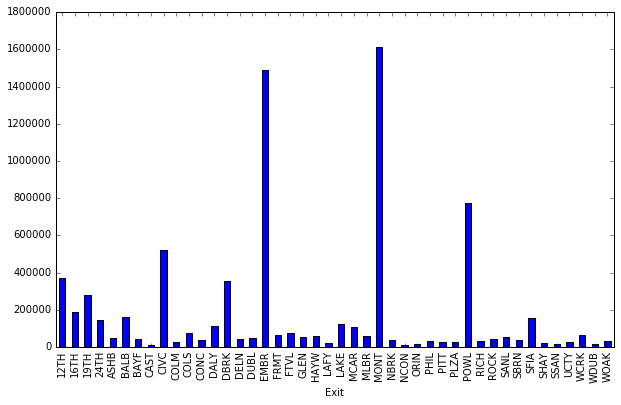

In [46]:
ts

9428124